<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M30_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [26]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [27]:
penguins = sns.load_dataset('penguins')

In [28]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [29]:
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [30]:
penguins_clean = penguins.dropna().copy()

In [31]:
penguins_numeric = penguins_clean.select_dtypes(include=['float64', 'int64'])

print("\nColunas restantes (apenas numéricas):")
print(penguins_numeric.columns.tolist())


Colunas restantes (apenas numéricas):
['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [32]:
penguins_numeric.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

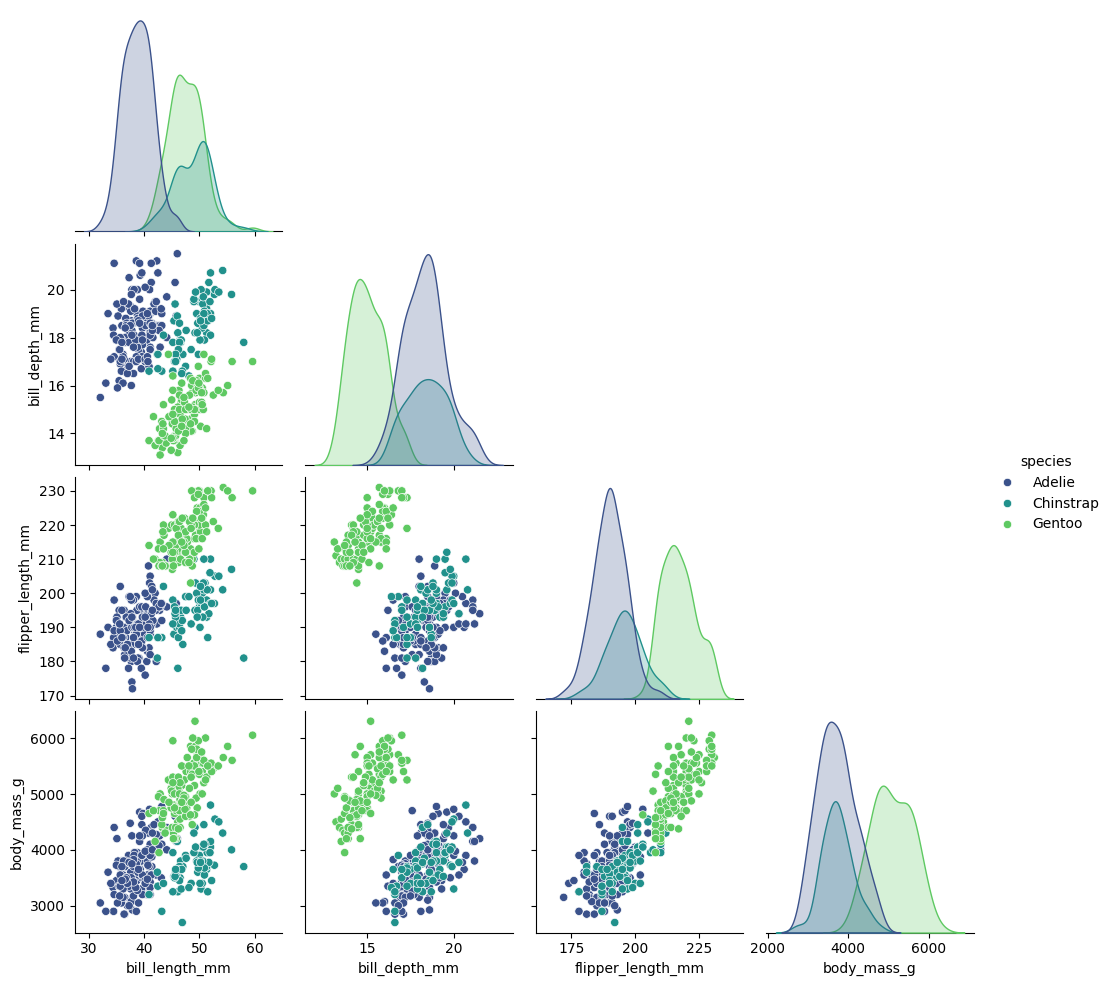

In [33]:
sns.pairplot(penguins_clean, hue='species', corner=True, palette='viridis')

Sim, é possível encontrar 3 agrupamentos.

Os pinguins Gentoo (verde no mapa) formam um bloco bem isolado e superior.

Os pinguins Adelie e Chinstrap ficam mais próximos entre si, mas ainda mostram núcleos distintos, especialmente se olharmos para o tamanho do bico.



# 3 - Realize a padronização dos dados e visualize os dados.

In [34]:
scaler = StandardScaler()

penguins_scaled = scaler.fit_transform(penguins_numeric)

df_scaled = pd.DataFrame(penguins_scaled, columns=penguins_numeric.columns)

print("Dados após padronização:")
print(df_scaled.head())

Dados após padronização:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
3       -1.335566       1.085877          -0.569284    -0.941606
4       -0.859415       1.747026          -0.783651    -0.692852


In [16]:
fig = px.box(df_scaled, title="Distribuição das Variáveis Após Padronização")
fig.show()

# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [36]:
clusters = kmeans.fit_predict(df_scaled)

In [37]:
penguins_clean.loc[:, 'cluster'] = clusters

In [20]:
print("Amostra dos dados com os clusters atribuídos:")
print(penguins_clean[['species', 'cluster']].head(10))

Amostra dos dados com os clusters atribuídos:
   species  cluster
0   Adelie        0
1   Adelie        0
2   Adelie        0
4   Adelie        0
5   Adelie        0
6   Adelie        0
7   Adelie        0
12  Adelie        0
13  Adelie        0
14  Adelie        0


In [38]:
print("Resultado da clusterização (primeiras 5 linhas):")
display(penguins_clean[['species', 'island', 'cluster']].head())

Resultado da clusterização (primeiras 5 linhas):


,species,island,cluster
0,Adelie,Torgersen,0
1,Adelie,Torgersen,0
2,Adelie,Torgersen,0
4,Adelie,Torgersen,0
5,Adelie,Torgersen,0


# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [40]:
centroides_scaled = kmeans.cluster_centers_

In [42]:
centroides_originais = scaler.inverse_transform(centroides_scaled)
df_centroides = pd.DataFrame(centroides_originais, columns=penguins_numeric.columns)

In [43]:
fig1 = px.scatter(penguins_clean, x='bill_length_mm', y='bill_depth_mm',
                 color='cluster', title='Gráfico 1: Bill Length vs Bill Depth',
                 color_continuous_scale='Viridis', opacity=0.6)

fig1.add_trace(go.Scatter(x=df_centroides['bill_length_mm'], y=df_centroides['bill_depth_mm'],
                         mode='markers', marker=dict(color='red', size=15, symbol='x'),
                         name='Centroides'))
fig1.show()

In [44]:
fig2 = px.scatter(penguins_clean, x='flipper_length_mm', y='body_mass_g',
                 color='cluster', title='Gráfico 2: Flipper Length vs Body Mass',
                 color_continuous_scale='Viridis', opacity=0.6)


fig2.add_trace(go.Scatter(x=df_centroides['flipper_length_mm'], y=df_centroides['body_mass_g'],
                         mode='markers', marker=dict(color='red', size=15, symbol='x'),
                         name='Centroides'))
fig2.show()

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

#1. Detecção de Anomalias e Cibersegurança
Esta é uma das utilizações mais críticas. Em vez de procurar por um vírus específico, o algoritmo agrupa o comportamento "normal" do tráfego de rede ou de transações financeiras. O algoritmo cria clusters do que é considerado padrão (ex: horários de acesso, volume de dados transferidos). Qualquer dado que fique muito longe desses centros (outlier) é sinalizado como uma potencial invasão, ataque hacker ou fraude no cartão de crédito.


#2. Processamento de Imagens e Visão Computacional
A clusterização é usada para simplificar imagens e identificar objetos (segmentação de imagem). O algoritmo agrupa pixels com cores ou intensidades semelhantes. Isso permite que um computador "separe" o que é o fundo (céu) do que é um objeto (um carro ou uma célula em um exame médico).


#3. Planejamento Urbano e Cidades Inteligentes
Urbanistas utilizam o K-means e outros algoritmos para organizar a infraestrutura das cidades com base no fluxo real das pessoas. Agrupando dados de GPS, sensores de tráfego e densidade populacional para identificar áreas de maior congestionamento ou carência de serviços.
